In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

from pathlib import Path
from pprint import pprint

from tqdm import tqdm, trange

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import fish

In [2]:
NOTEBOOK_NAME = "petri_dish"

HERE = Path.cwd().absolute()
DATA = HERE.parent / "data"
OUT = HERE / "out" / Path(NOTEBOOK_NAME).stem
print(HERE)
print(DATA)
print(OUT)

D:\projects\fish\dev
D:\projects\fish\data
D:\projects\fish\dev\out\petri_dish


In [3]:
frames = fish.cached_read(DATA / "D1-6.hsv")[100:]
frames.shape

(1717, 1024, 1280)

In [4]:
bsub = fish.train_background_subtractor(frames, iterations = 1)

Training background model (iteration 1): 100%|██████████| 1717/1717 [00:26<00:00, 63.73it/s]


D:\projects\fish\fish\figs.py:20: UserWarning: tight_layout : falling back to Agg renderer
  fig.tight_layout()


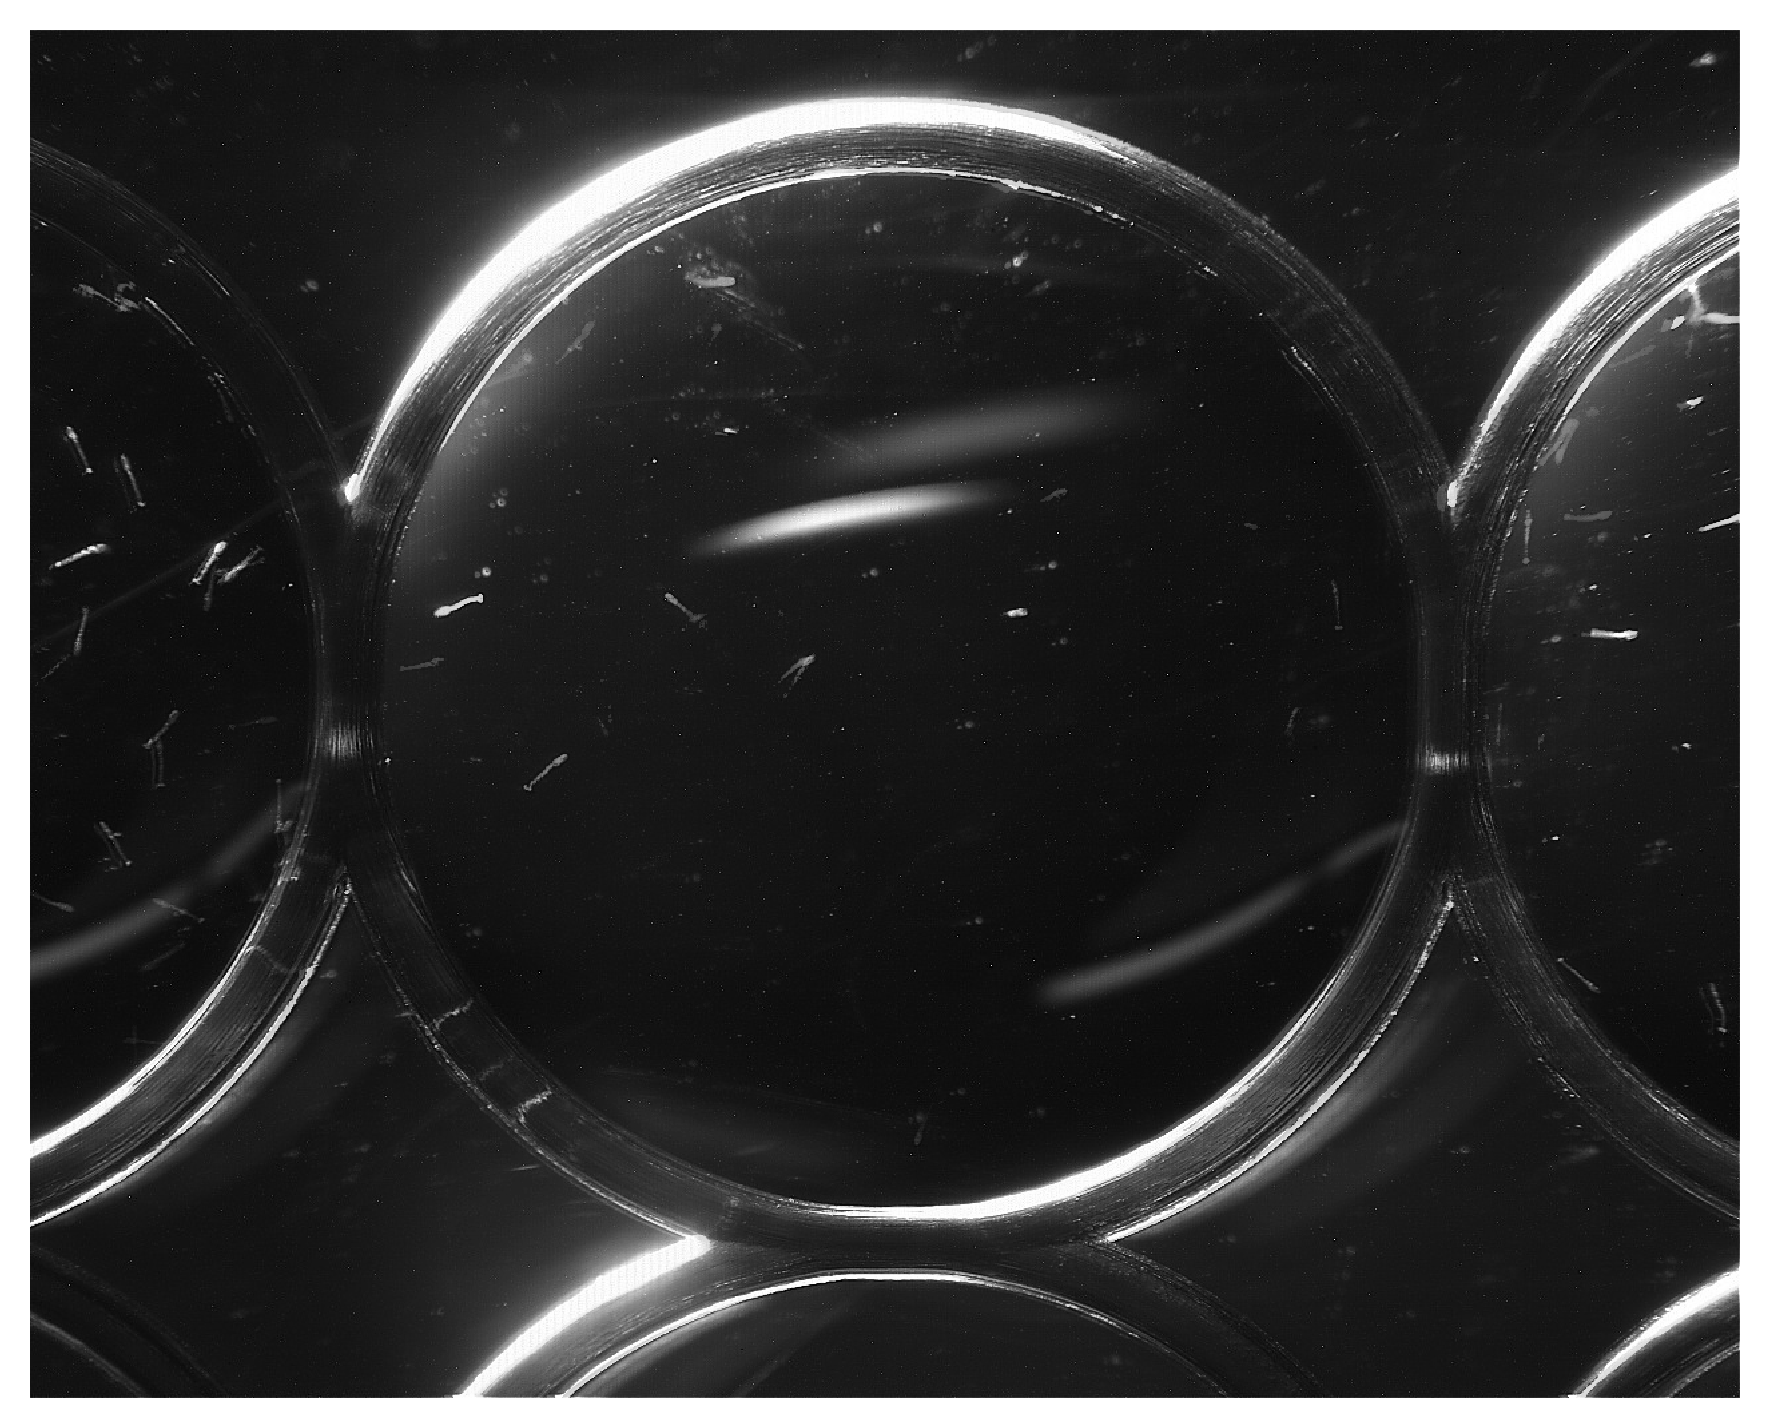

In [20]:
bgnd = bsub.getBackgroundImage()
fish.show_frame(bgnd)

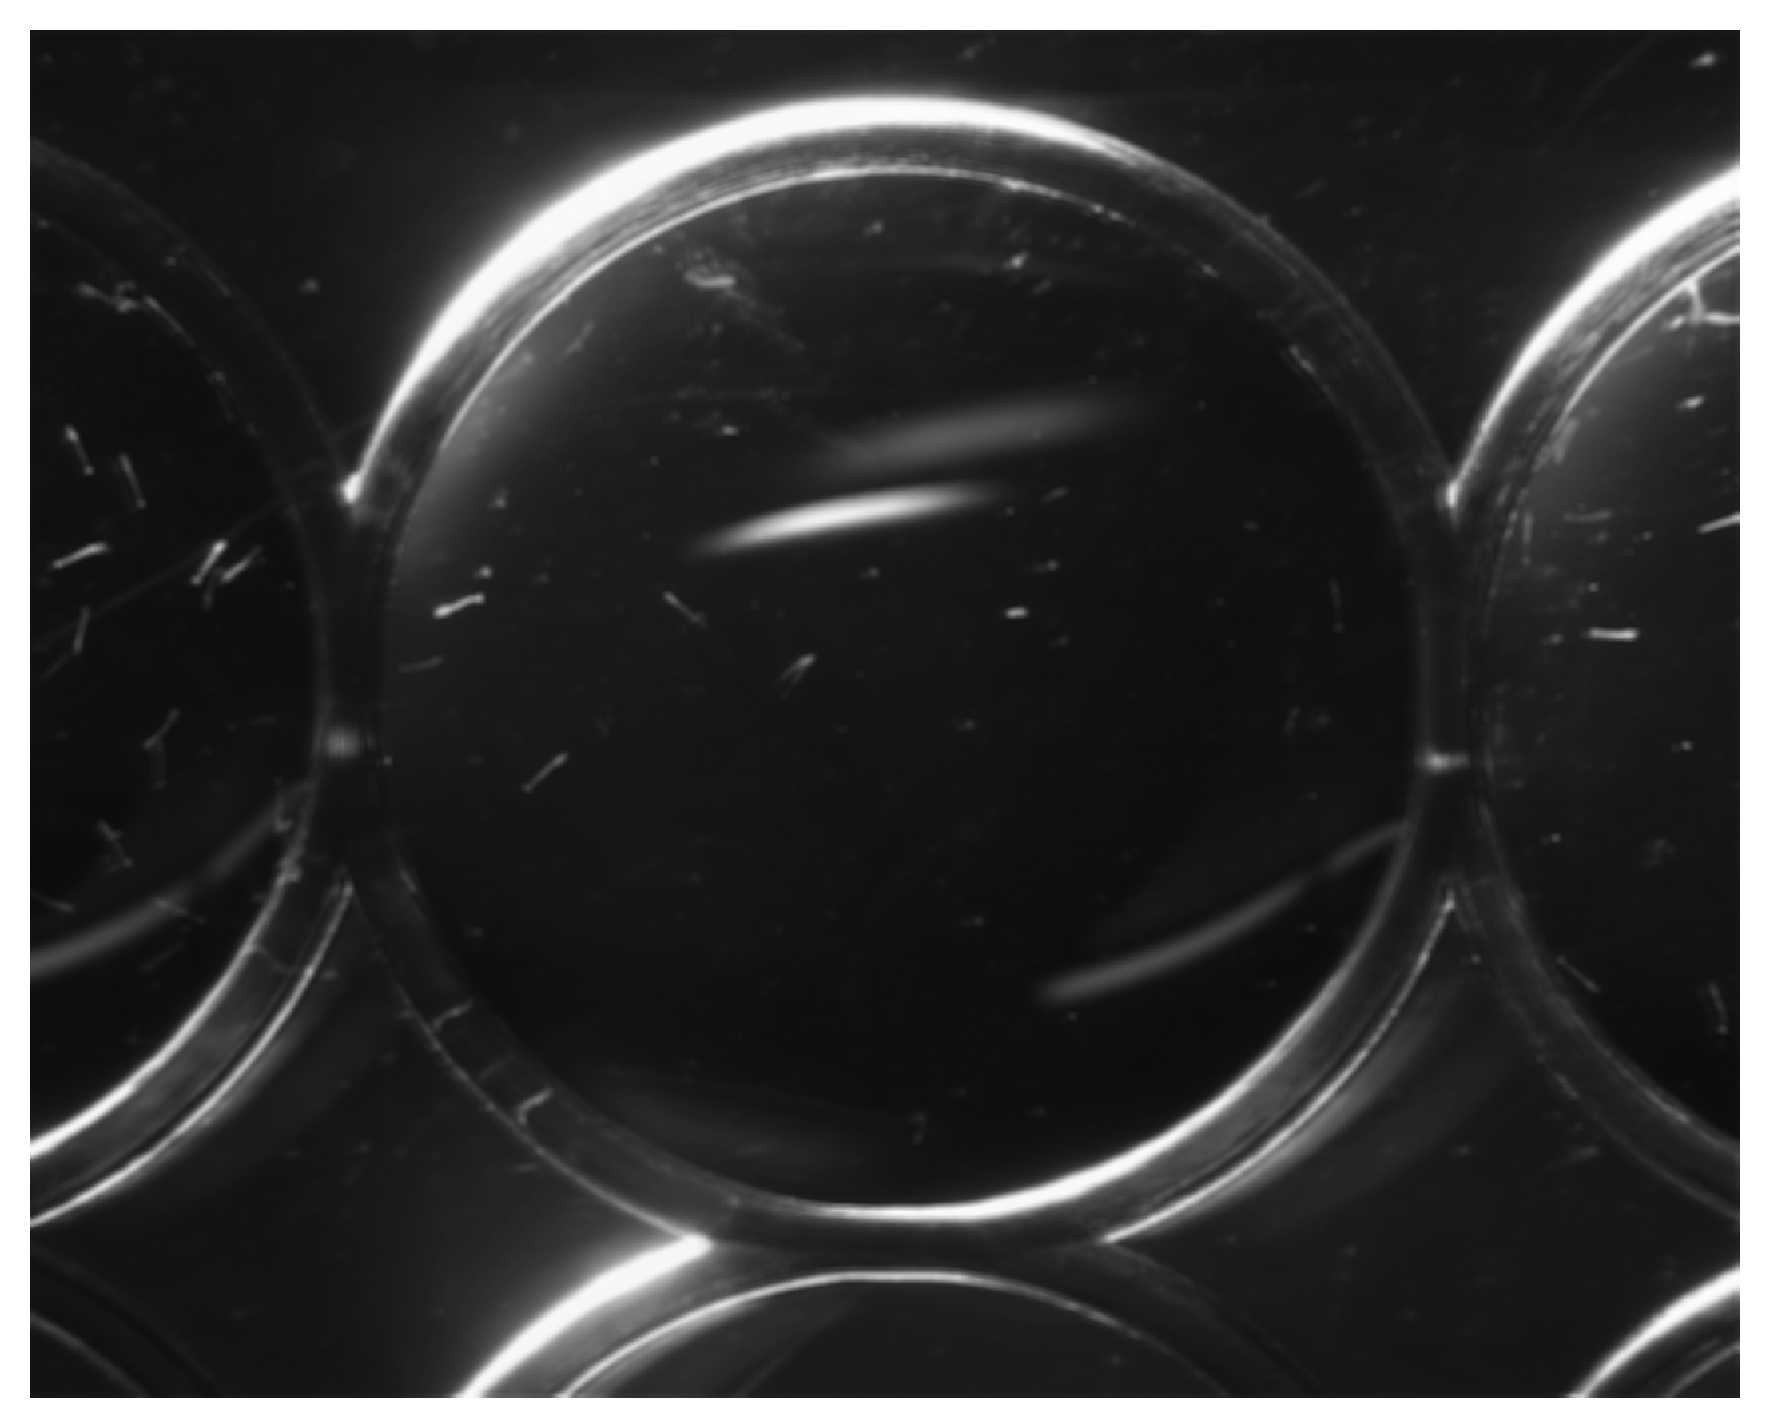

In [21]:
blurred = cv.GaussianBlur(bgnd, (7, 7), 3)
fish.show_frame(blurred)

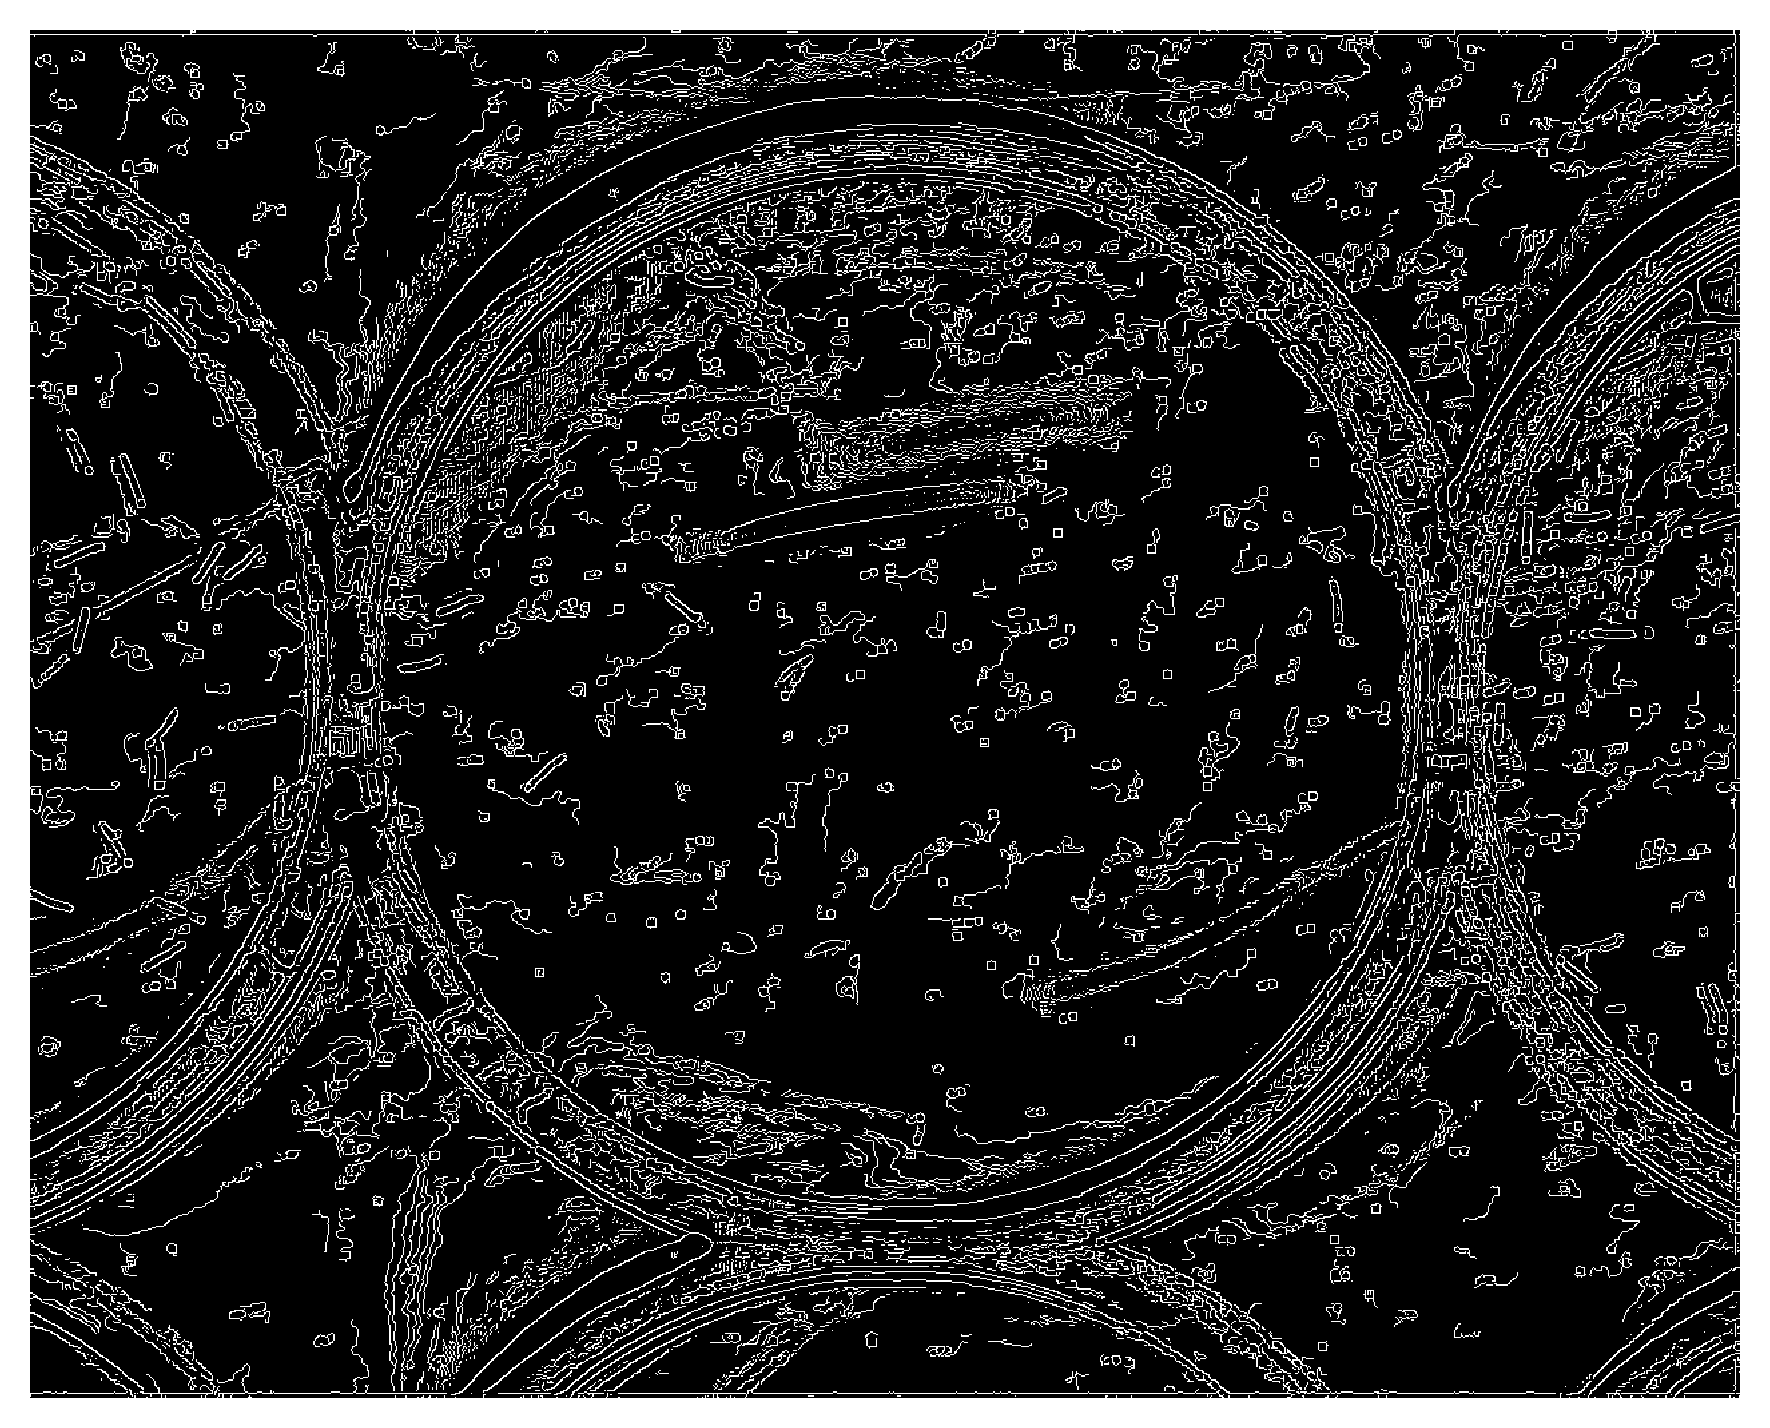

In [22]:
edges = cv.Canny(blurred, 3, 7, L2gradient = True)
fish.show_frame(edges)

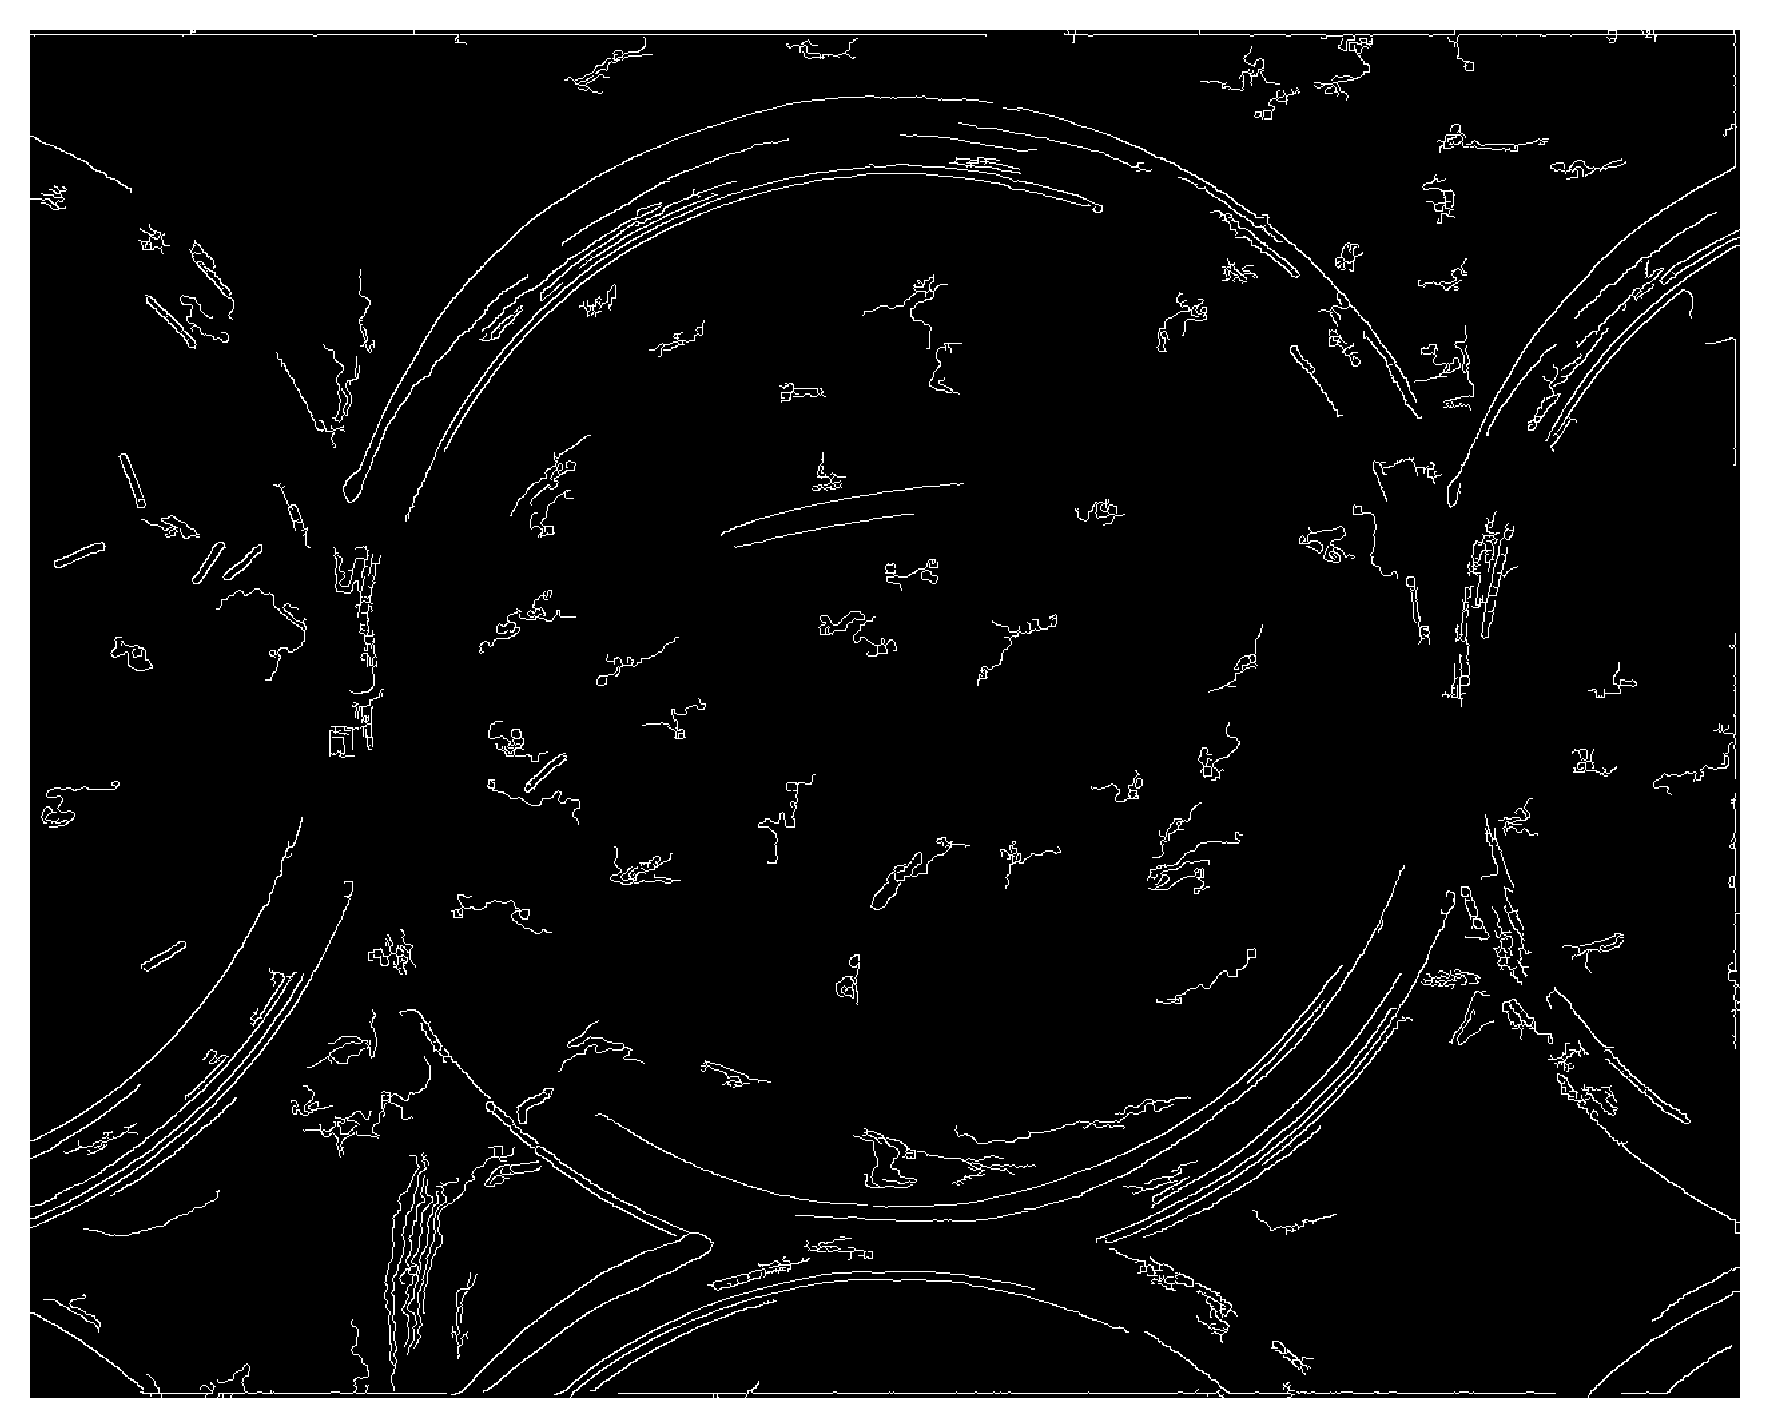

In [23]:
filtered = fish.remove_components_below_cutoff_area(edges, 100)
fish.show_frame(filtered)

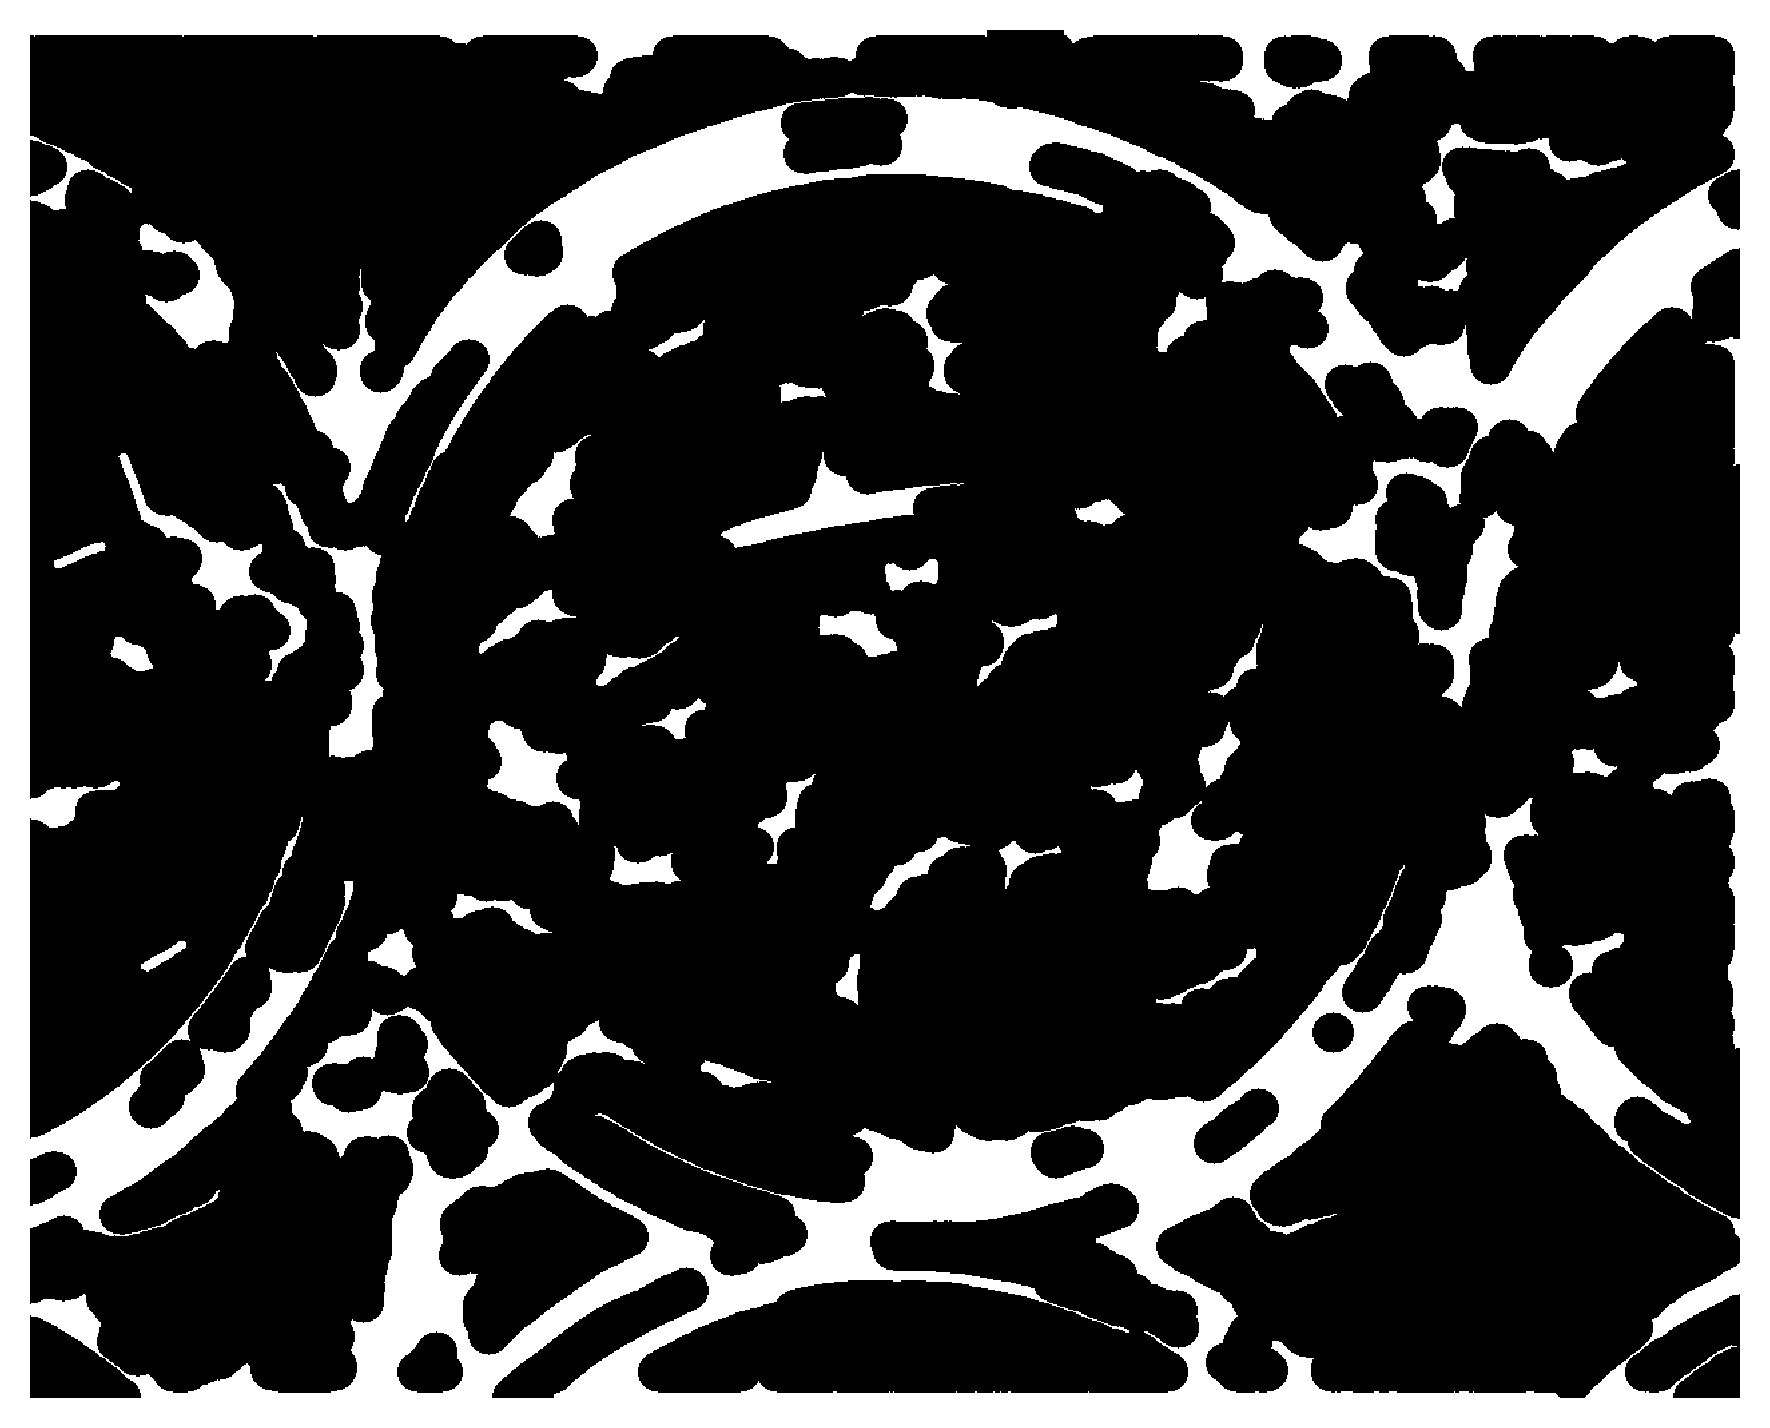

In [24]:
closed = cv.morphologyEx(filtered, cv.MORPH_CLOSE, fish.CIRCLE_CLOSING_KERNEL)
fish.show_frame(closed)

In [25]:
circles = fish.find_circles_via_hough_transform(closed)
circles

[Circle(x=648, y=502, r=453),
 Circle(x=692, y=623, r=582),
 Circle(x=586, y=403, r=336),
 Circle(x=718, y=423, r=529),
 Circle(x=772, y=516, r=502),
 Circle(x=545, y=534, r=485),
 Circle(x=671, y=309, r=306),
 Circle(x=607, y=682, r=336),
 Circle(x=758, y=750, r=269)]

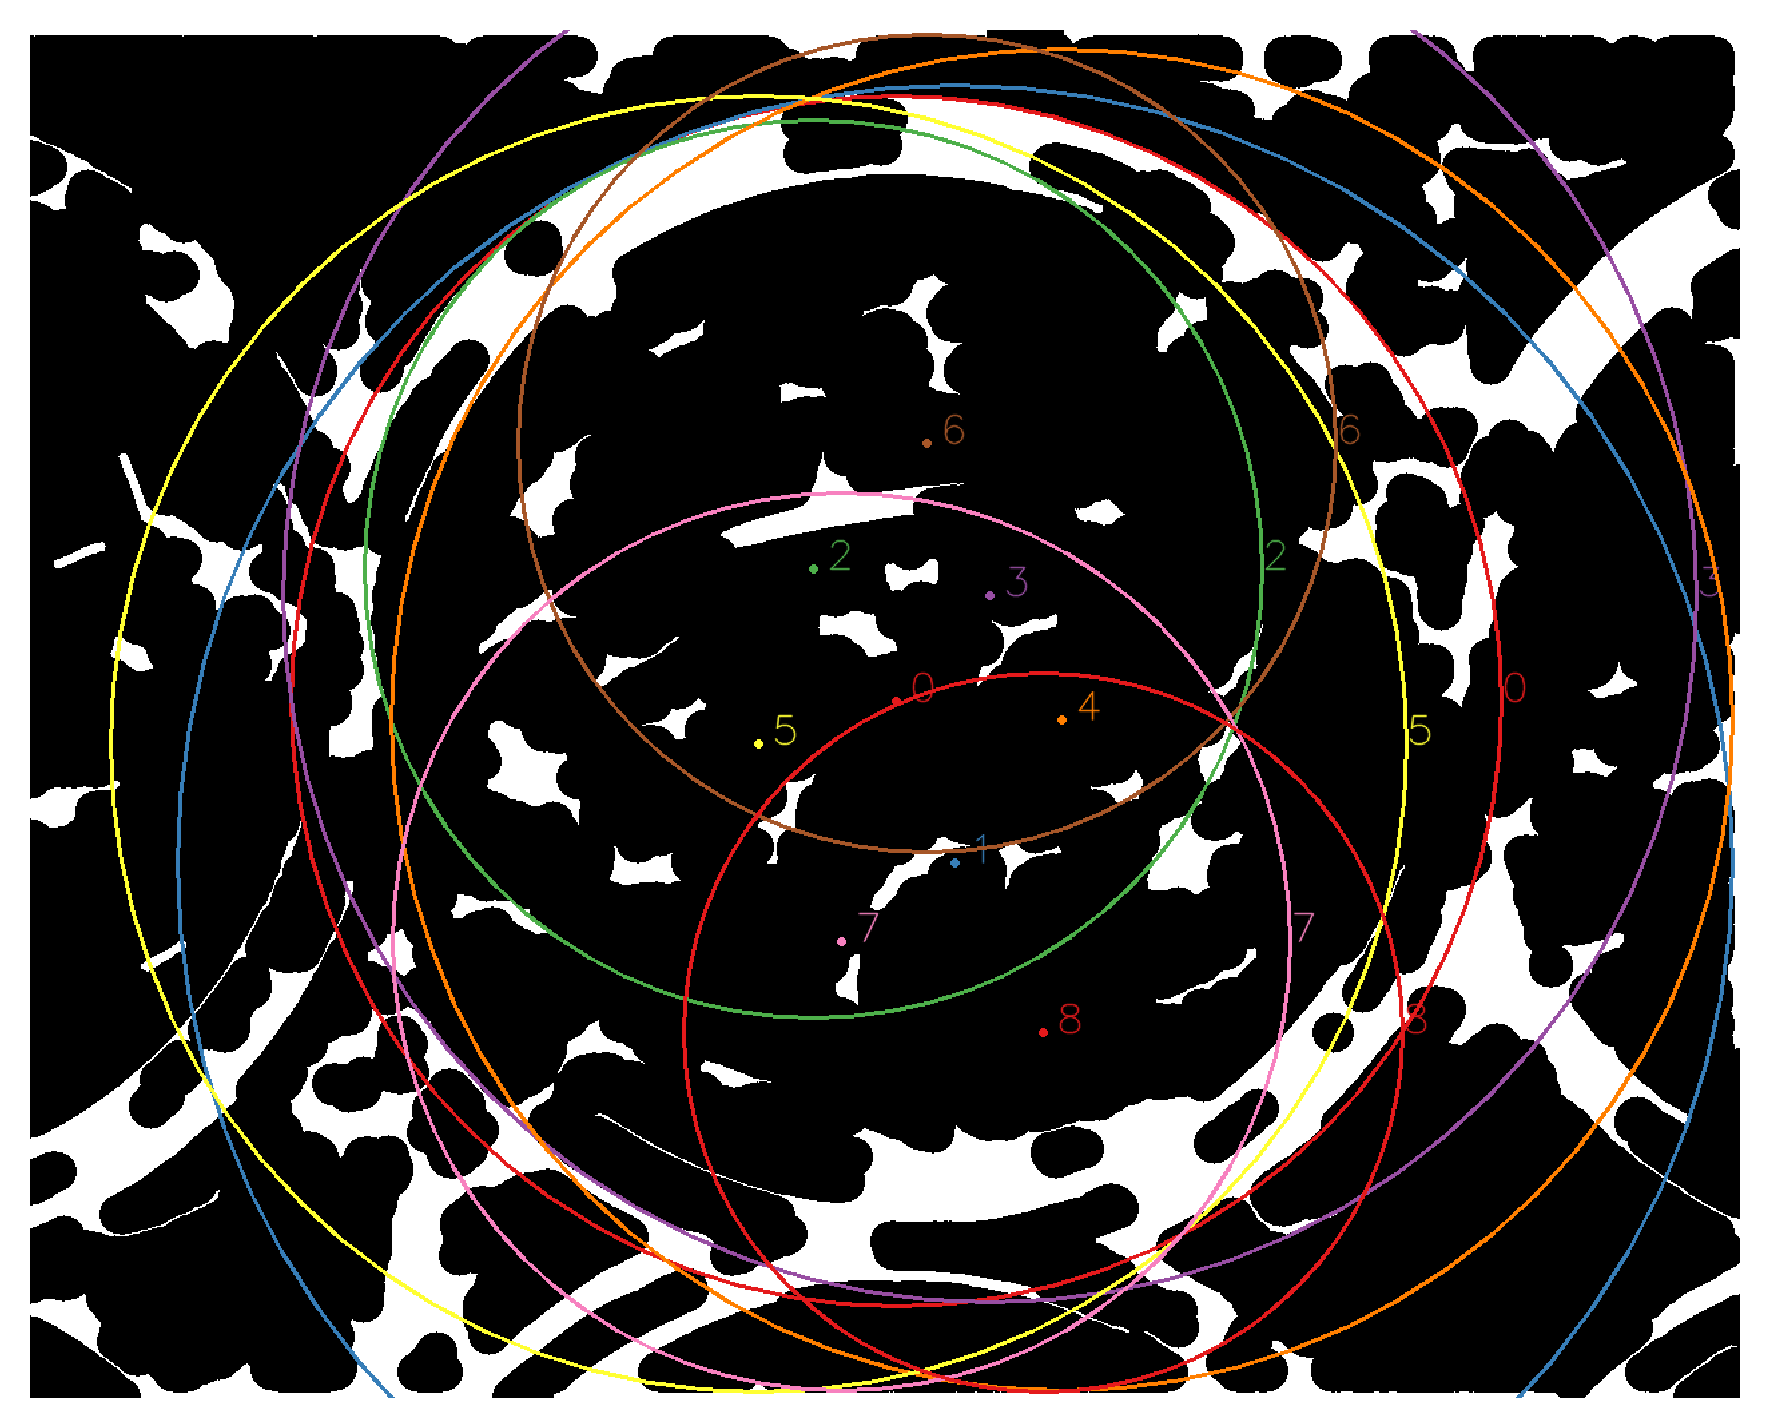

In [26]:
circled = fish.draw_circles(closed, circles, mark_centers = True, label = True)
fish.show_frame(fish.bgr_to_rgb(circled))

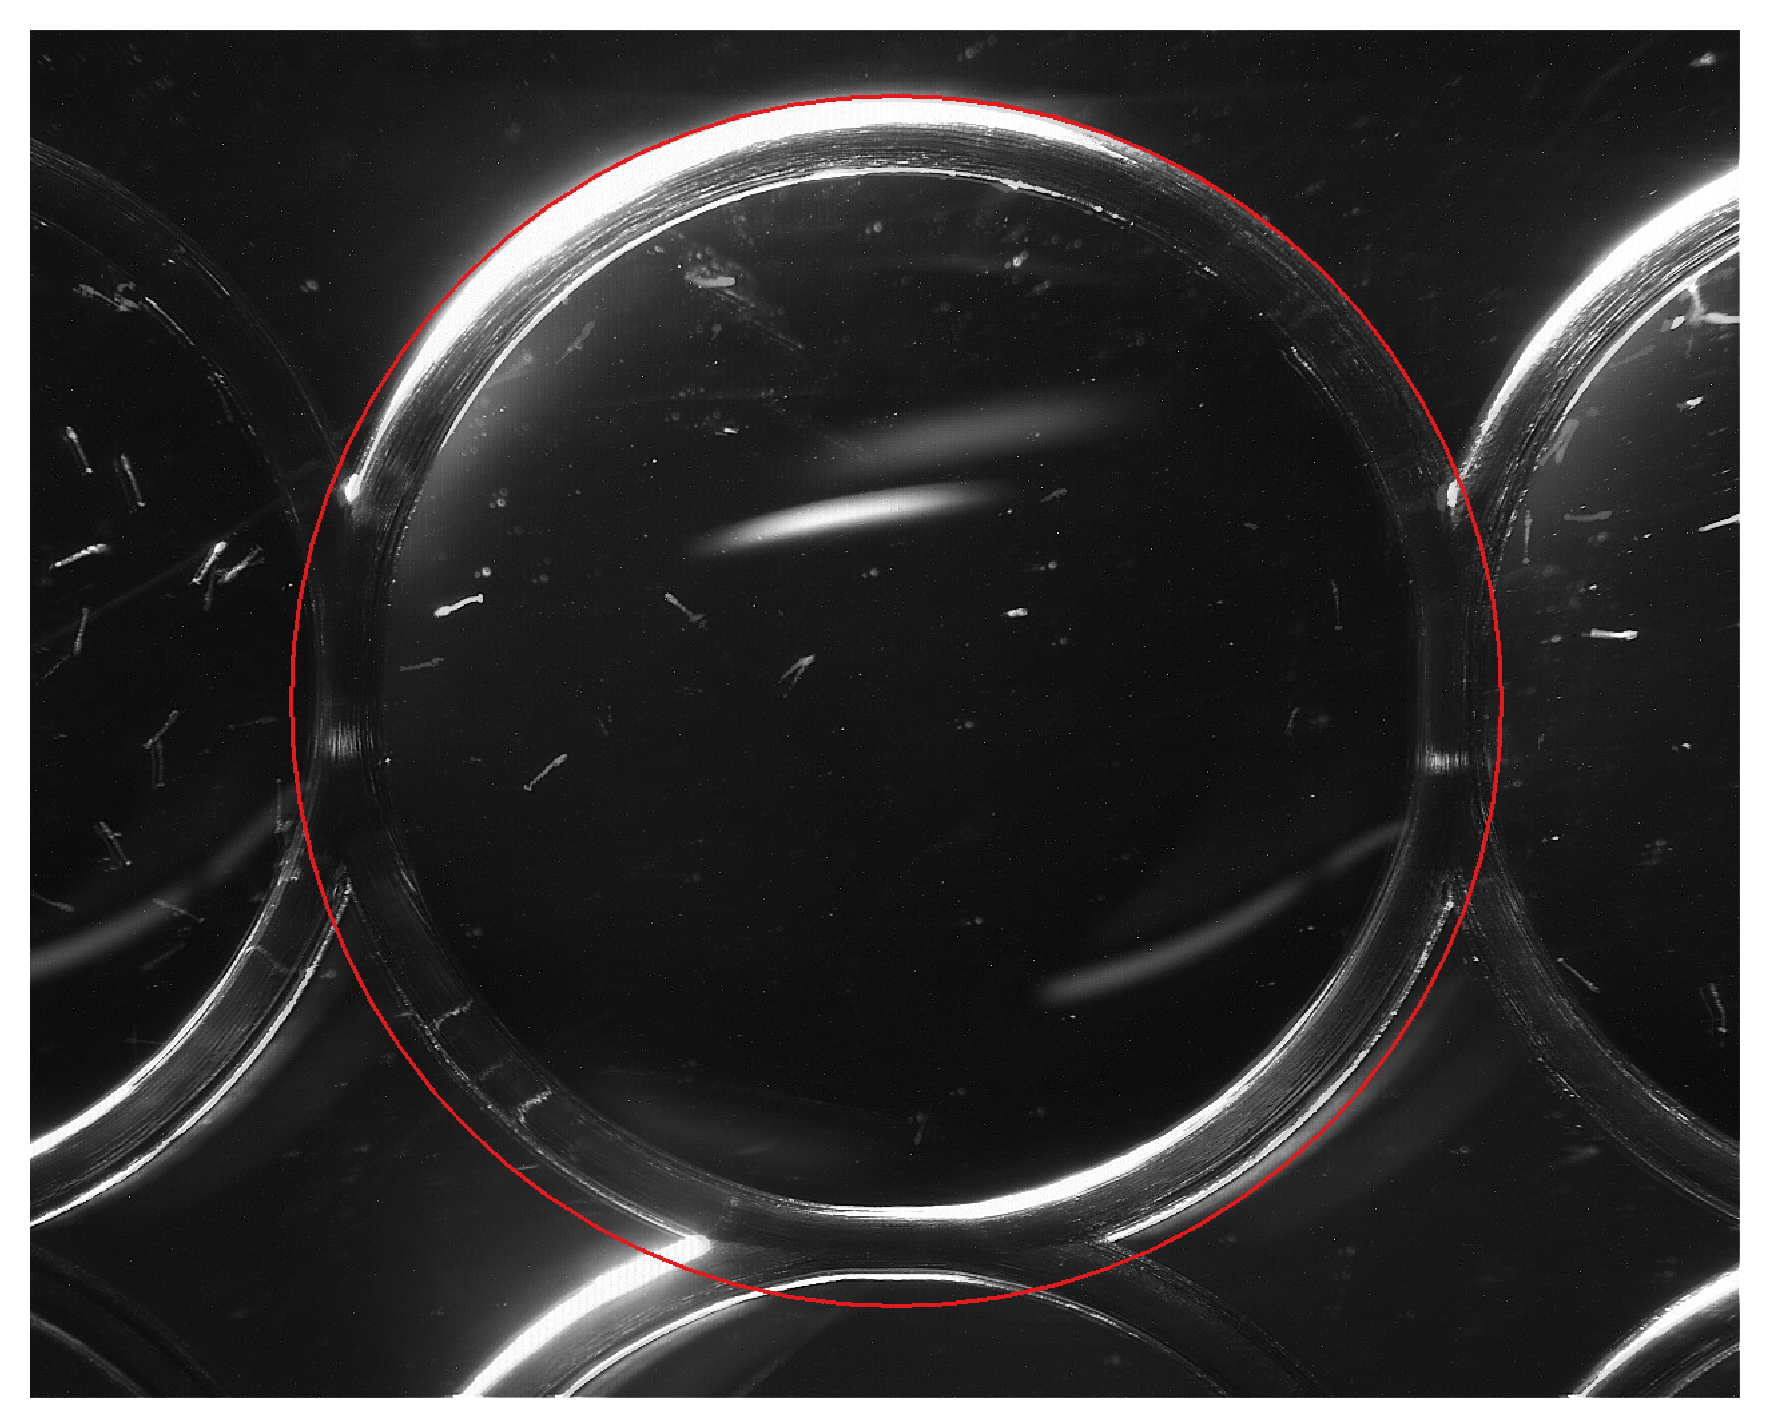

In [27]:
dish = fish.decide_dish(circles)
dished = fish.draw_circles(bgnd, [dish])
fish.show_frame(fish.bgr_to_rgb(dished))
